# Using merge_asof() to create dataset

The merge_asof() function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. You have been given gdp, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table recession has been given to you. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use merge_asof() to merge the tables and create a status flag if a quarter was during a recession. Finally, to check your work, plot the data in a bar chart.


* Using merge_asof(), merge gdp and recession on date, with gdp as the left table. Save to the variable gdp_recession.
* Create a list using a list comprehension and a conditional expression, named is_recession, where for each row if the gdp_recession['econ_status'] value is equal to 'recession' then enter 'r' else 'g'.
* Using gdp_recession, plot a bar chart of gdp versus date, setting the color argument equal to is_recession.

In [1]:
import pandas as pd

recession = pd.read_csv("/kaggle/input/recession/CPICPIAUCSL.csv")
gdp = pd.read_csv("/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp.csv")

recession.head()


,DATE,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [2]:
gdp.head()

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,...,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11,NaN
2,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,...,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10,NaN


In [ ]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on = "date")

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind="bar", y="gdp", x="date", color=is_recession, rot=90)
plt.show()

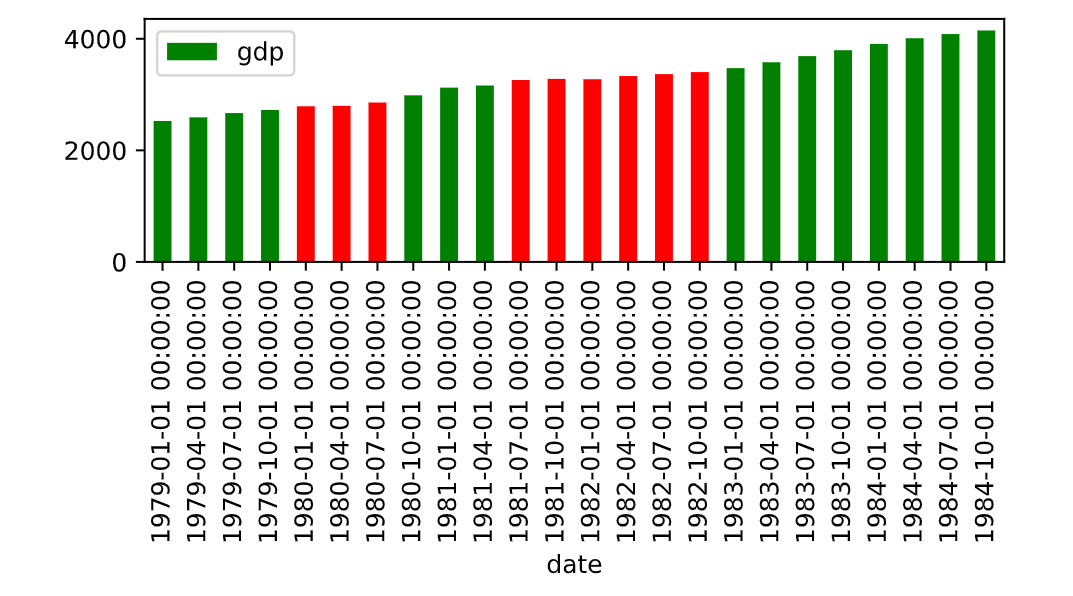

You can see from the chart that there were a number of quarters early in the 1980s where a recession was an issue. merge_asof() allowed you to quickly add a flag to the gdp dataset by matching between two different dates, in one line of code! If you were to perform the same task using subsetting, it would have taken a lot more code.

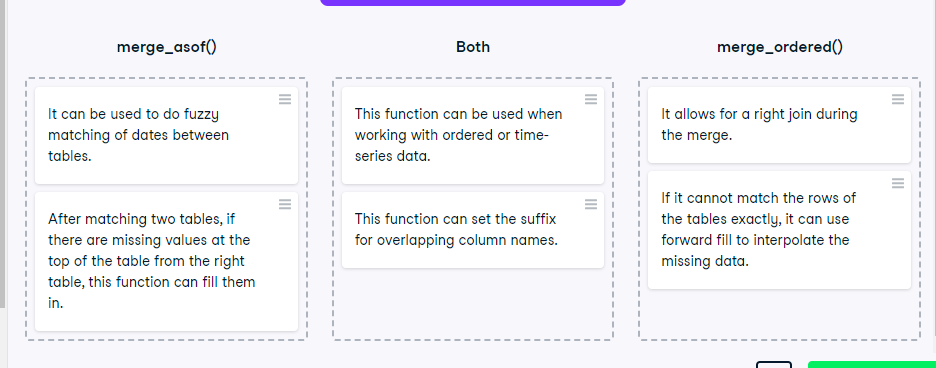

**Subsetting rows with .query()**
In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the .query() method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the .query() method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.


* Use merge_ordered() on gdp and pop on columns country and date with the fill feature, save to gdp_pop and print.
* Add a column named gdp_per_capita to gdp_pop that divides gdp by pop.
* Pivot gdp_pop so values='gdp_per_capita', index='date', and columns='country', save as gdp_pivot.
* Use .query() to select rows from gdp_pivot where date is greater than equal to "1991-01-01". Save as recent_gdp_pop.


In [ ]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

# Pivot data so gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')

# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

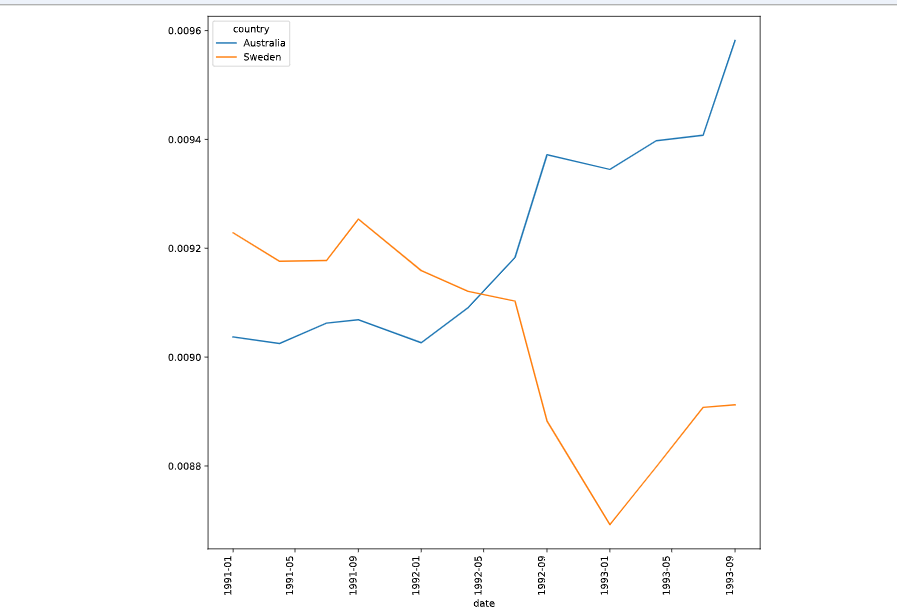

Amazing! You can see from the plot that the per capita GDP of Australia passed Sweden in 1992. By using the .query() method, you were able to select the appropriate rows easily. The .query() method is easy to read and straightforward.

# Using .melt() to reshape government data

The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot using .melt(). You will need to add a date column to the table and sort by it to plot the data correctly.

The unemployment rate data has been loaded for you in a table called ur_wide. You are encouraged to explore this table before beginning the exercise.


* Use .melt() to unpivot all of the columns of ur_wide except year and ensure that the columns with the months and values are named month and unempl_rate, respectively. Save the result as ur_tall.
* Add a column to ur_tall named date which combines the year and month columns as year-month format into a larger string, and converts it to a date data type.
* Sort ur_tall by date and save as ur_sorted.
* Using ur_sorted, plot unempl_rate on the y-axis and date on the x-axis.

In [ ]:
# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars= ['year'], var_name = 'month', value_name = "unempl_rate")


# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['month'] + '-' + ur_tall['year'])

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values('date')
# Plot the unempl_rate by date
ur_sorted.plot(x = 'date', y ='unempl_rate')
plt.show()

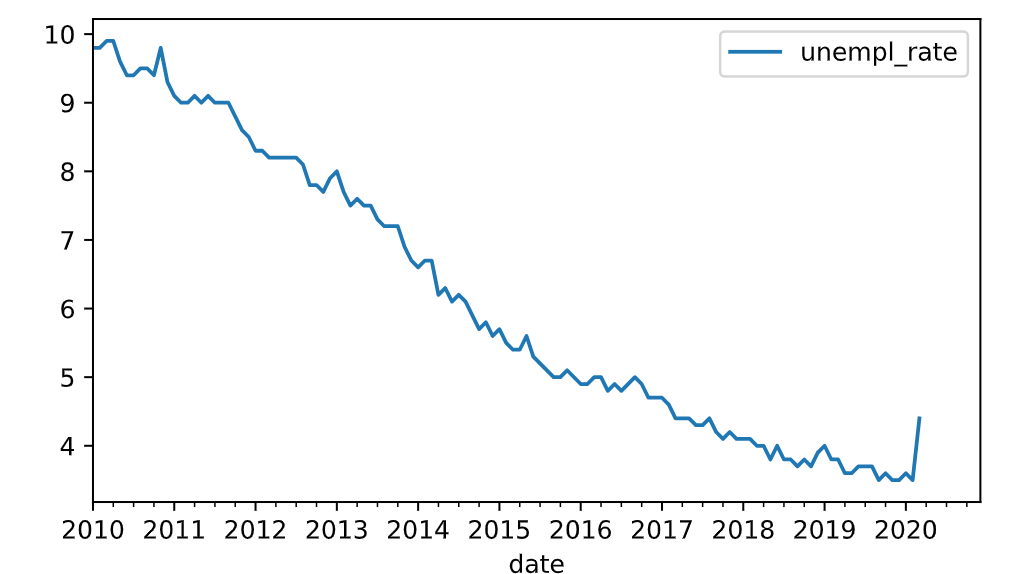

Nice going! The plot shows a steady decrease in the unemployment rate with an increase near the end. This increase is likely the effect of the COVID-19 pandemic and its impact on shutting down most of the US economy. In general, data is often provided (_especially by governments_) in a format that is easily read by people but not by machines. The .melt() method is a handy tool for reshaping data into a useful form.

**Using .melt() for stocks vs bond performance**

It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the .melt() method to reshape this table.

Additionally, you will use the .query() method to filter out unneeded data. You will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.

The tables ten_yr and dji have been loaded for you.



* Use .melt() on ten_yr to unpivot everything except the metric column, setting var_name='date' and value_name='close'. Save the result to bond_perc.
* Using the .query() method, select only those rows where metric equals 'close', and save to bond_perc_close.
* Use merge_ordered() to merge dji (left table) and bond_perc_close on date with an inner join, and set suffixes equal to ('_dow', '_bond'). Save the result to dow_bond.
* Using dow_bond, plot only the Dow and bond values.

In [ ]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars= ['metric'], var_name = "date", value_name = "close")

# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query('metric == "close"')
# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close,how = "inner", on ="date", suffixes = ('_dow', '_bond'))


# Plot only the close_dow and close_bond columns
dow_bond.plot(y=['close_dow', 'close_bond'], x='date', rot=90)
plt.show()

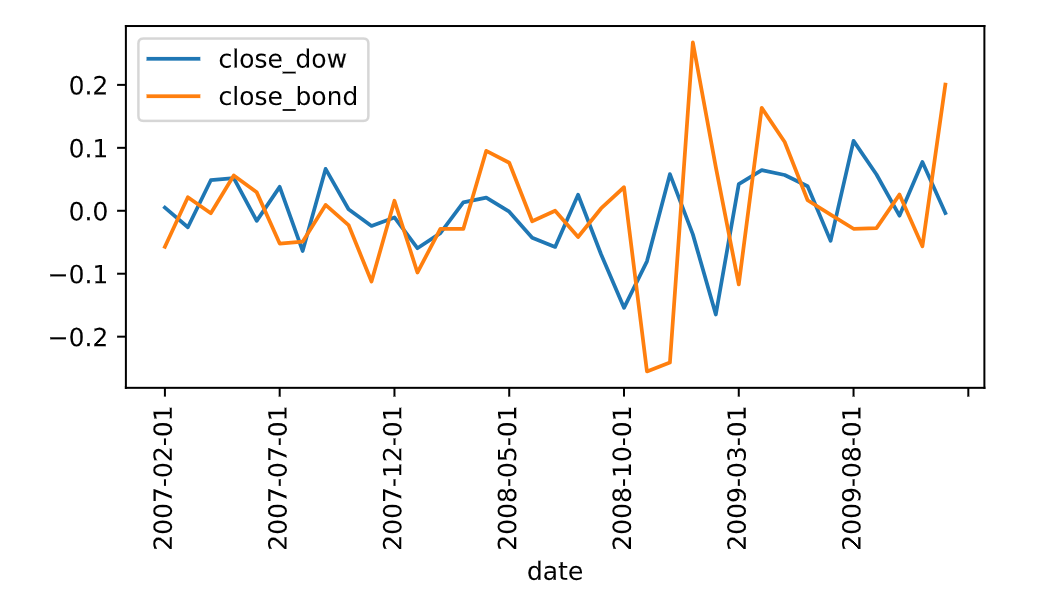

Super job! You used many of the techniques we have reviewed in this chapter to produce the plot. The plot confirms that the bond and stock prices are inversely correlated. Often as the price of stocks increases, the price for bonds decreases.